<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/bdm/Ayam%20Rendang/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: High-Rise Houses Rental Surrounding Kuala Lumpur and Selangor, Malaysia EDA**

Project Introduction:

This project based on the dataset contains information on rent pricing surrounding Kuala Lumpur and Selangor region, Malaysia. The dataset is retrieved from Kaggle database. The owner of the dataset garnered the data through web scrapping form mudah.com. The project objective is to carry out EDA on this dataset to analyze the patterns and trends especilly of high-rise houses rental surrounding Kuala Lumper and Selangor, Malaysia regions and visualize the findings using appropriate visulisation methods as part of descriptive data analysis.

We will as the team will be using tools such as io, Pandas, NumPy, and Matplotlib for data manipulation, analysis, and visualization. The EDA tools that are chosen for the this lab task:

*   Pandas-Profiling
*   SweetViz

*   DataPrep

Some of the visualization graphs our group has made to gain the insight from the dataset are:


*   Scatter Plot

*   Heatmap
*   Box Chart

*   Bar Chart



**Team Member:**

THANEATHARRAN A/L SANTHARASEKARAN (MSC232006)

RANJEET A/L THIAGARAJAN (MCS231015)

NURUL WAHIEDA BINTI MUHAMMAD FARID SELLEKUMAR (MCS231022)

LINGGESH A/L TAMILMANI (MCS232005)


# **STEP 1: Downloading the Dataset**

The dataset is dowloaded from Kaggle and uploaded into GitHub.

The analysis is been conducted throught the GitHub link as shown in Step 2.

The link:

*   https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/bdm/Ayam%20Rendang/mudah-apartment-kl-selangor.csv



# **STEP 2: Data Preparation and Cleaning**

Import the Python Pandas Library to:



*   Load the dataset into a data frame using Pandas
*   Explore the number of rows & columns, ranges of values etc.
*   Handle missing, incorrect and invalid data
*   Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)





In [ ]:
import pandas as pd

### **Load the dataset into a data frame using Pandas**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/bdm/Ayam%20Rendang/mudah-apartment-kl-selangor.csv")

### **Explore the number of rows & columns, ranges of values etc.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

### **Handle missing, incorrect and invalid data**

In [ ]:
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [ ]:
''' Remove the rows with missing value for the prop_name because prop_name is an important attribute
considered as invaluable'''

df.dropna(subset = ["prop_name"], inplace = True)

In [ ]:
df.isna().sum()

ads_id                      0
prop_name                   0
completion_year          8237
monthly_rent                1
location                    0
property_type               0
rooms                       0
parking                  5392
bathroom                    0
size                        0
furnished                   1
facilities               2089
additional_facilities    5629
region                      0
dtype: int64

In [ ]:
# we remove the completion_year column since it not much valuable data for the rental property seekers

df.drop(["completion_year"], axis = 1, inplace = True)

In [ ]:
# we also remove other rows that have missing values for atrributes such as parking and facilities since the data are vital

df.dropna(subset = ["parking", "facilities"], inplace = True)
df.isna().sum()

ads_id                      0
prop_name                   0
monthly_rent                1
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   1
facilities                  0
additional_facilities    2696
region                      0
dtype: int64

In [ ]:
# we also remove the duplicates

df.drop_duplicates()

,ads_id,prop_name,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
5,100322897,Residensi Vista Wirajaya,RM 1 500 per month,Kuala Lumpur - Setapak,Apartment,3,1.0,2.0,884 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,100493771,BSP Skypark Serviced Residence,RM 1 800 per month,Selangor - Kuala Langat,Service Residence,4.0,3.0,3.0,1261 sq.ft.,Partially Furnished,"Gymnasium, Minimart, Playground, Sauna, Swimmi...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19987,100371347,BSP 21,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,100493228,Ameera Residence,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,100235153,The Arc @ Cyberjaya,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


In [ ]:
# we also remove the aditional_facilities column as it is contains a lot of missing values and ads_id as it is not needed

df.drop(["additional_facilities"], axis = 1, inplace = True)
df.drop(["ads_id"], axis = 1, inplace = True)


In [ ]:
# we remove the extra missing value in the dataset and check again for the missing values in the daaset
df.dropna()
df.isna().sum()

prop_name        0
monthly_rent     1
location         0
property_type    0
rooms            0
parking          0
bathroom         0
size             0
furnished        1
facilities       0
region           0
dtype: int64

In [ ]:
df.dropna(subset = ["monthly_rent","furnished"], inplace = True)
df.isna().sum()

prop_name        0
monthly_rent     0
location         0
property_type    0
rooms            0
parking          0
bathroom         0
size             0
furnished        0
facilities       0
region           0
dtype: int64

## **Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)**

In [ ]:
# we rename the prop_name and furnished to more semantic attribute names

df.rename(columns = {"prop_name":"Property_name","furnished":"furnish_info"}, inplace = True)
df.head()

,Property_name,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnish_info,facilities,region
0,The Hipster @ Taman Desa,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...",Kuala Lumpur
1,Segar Courts,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...",Kuala Lumpur
3,Sentul Point Suite Apartment,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...",Kuala Lumpur
4,Arte Mont Kiara,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Kuala Lumpur
5,Residensi Vista Wirajaya,RM 1 500 per month,Kuala Lumpur - Setapak,Apartment,3,1.0,2.0,884 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Kuala Lumpur


In [ ]:
# we allocate the units found with each element in the dataset to the header of that specific element's column and removes the units followed by the elements

df["size"] = df["size"].str.strip("sq.ft")
df["monthly_rent"] = df["monthly_rent"].str.strip("RM per month")
df["monthly_rent"] = df["monthly_rent"].str.strip(" ")
df.rename(columns = {"monthly_rent":"monthly_rent(RM)","size":"size(sq.ft)"}, inplace = True)
df.head(3)

,Property_name,monthly_rent(RM),location,property_type,rooms,parking,bathroom,size(sq.ft),furnish_info,facilities,region
0,The Hipster @ Taman Desa,4 200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...",Kuala Lumpur
1,Segar Courts,2 300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...",Kuala Lumpur
3,Sentul Point Suite Apartment,1 700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...",Kuala Lumpur


In [ ]:
# we removes redundant info associated with each values
# eg: region elements have their own column but also found with elements in location column

dfsplit = df['location'].str.split("-",expand = True)
dfsplit
df.insert(loc = 2,column = 'Area',value = dfsplit[1])
df.drop(columns = "location", inplace = True)
df["monthly_rent(RM)"] = df["monthly_rent(RM)"].str.replace(" ","")
df


,Property_name,monthly_rent(RM),Area,property_type,rooms,parking,bathroom,size(sq.ft),furnish_info,facilities,region
0,The Hipster @ Taman Desa,4200,Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...",Kuala Lumpur
1,Segar Courts,2300,Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...",Kuala Lumpur
3,Sentul Point Suite Apartment,1700,Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...",Kuala Lumpur
4,Arte Mont Kiara,1299,Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Kuala Lumpur
5,Residensi Vista Wirajaya,1500,Setapak,Apartment,3,1.0,2.0,884,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...
19984,BSP Skypark Serviced Residence,1800,Kuala Langat,Service Residence,4.0,3.0,3.0,1261,Partially Furnished,"Gymnasium, Minimart, Playground, Sauna, Swimmi...",Selangor
19987,BSP 21,1300,Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...",Selangor
19988,Ameera Residence,1350,Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Selangor
19989,The Arc @ Cyberjaya,1200,Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Selangor


In [ ]:
df["bathroom"] = df["bathroom"].astype("int32")
df["parking"] = df["parking"].astype("int32")
df["monthly_rent(RM)"] = df["monthly_rent(RM)"].astype("int32")
df["size(sq.ft)"] = df["size(sq.ft)"].astype("int32")

df.dtypes



Property_name       object
monthly_rent(RM)     int32
Area                object
property_type       object
rooms               object
parking              int32
bathroom             int32
size(sq.ft)          int32
furnish_info        object
facilities          object
region              object
dtype: object

In [ ]:
df.to_csv("cleaned_mudah-apartment-kl-selangor.csv")

# STEP 3: Exploratory Analysis and Visualization

* Compute the mean, sum, range and other interesting statistics for numeric columns
* Explore distributions of numeric columns using histograms etc.
* Explore relationship between columns using scatter plots, bar charts etc.
* Make a note of interesting insights from the exploratory analysis

#### The mean, sum, range and other statistics values for numeric columns

In [ ]:
#Let's begin by importing`matplotlib.pyplot` and `seaborn`.

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# To display summary statistics for numerical columns

df.describe()

,monthly_rent(RM),parking,bathroom,size(sq.ft)
count,1.255700e+04,12557.000000,12557.000000,1.255700e+04
mean,2.507768e+03,1.406785,1.930318,8.913450e+03
std,2.676097e+04,0.563585,0.535014,8.923865e+05
min,9.000000e+01,1.000000,1.000000,1.000000e+00
25%,1.200000e+03,1.000000,2.000000,8.000000e+02
50%,1.500000e+03,1.000000,2.000000,9.080000e+02
75%,1.900000e+03,2.000000,2.000000,1.065000e+03
max,2.400000e+06,10.000000,8.000000,1.000000e+08


In [ ]:
# To check the data types of each columns

df.dtypes

Property_name       object
monthly_rent(RM)     int32
Area                object
property_type       object
rooms               object
parking              int32
bathroom             int32
size(sq.ft)         object
furnish_info        object
facilities          object
region              object
dtype: object

## Explore one or more columns by plotting a graph below, and add some explanation about it

#### Rental vs Size

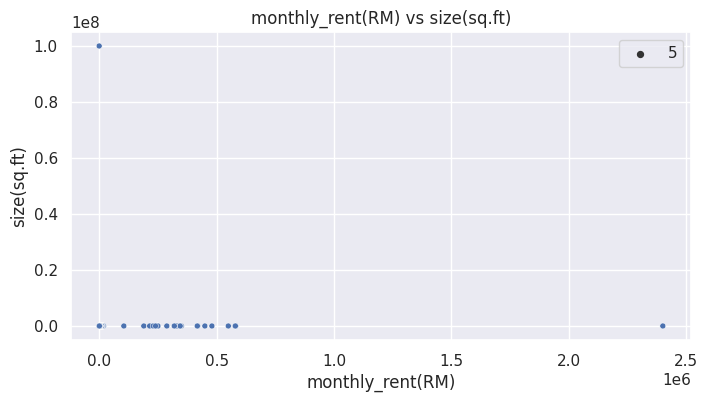

In [ ]:
# Scatter Plot (Price vs. Size)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='monthly_rent(RM)', y='size(sq.ft)', size=5)  # Set a constant size
plt.title('monthly_rent(RM) vs size(sq.ft)')
plt.show()

#### Parking vs Bathroom

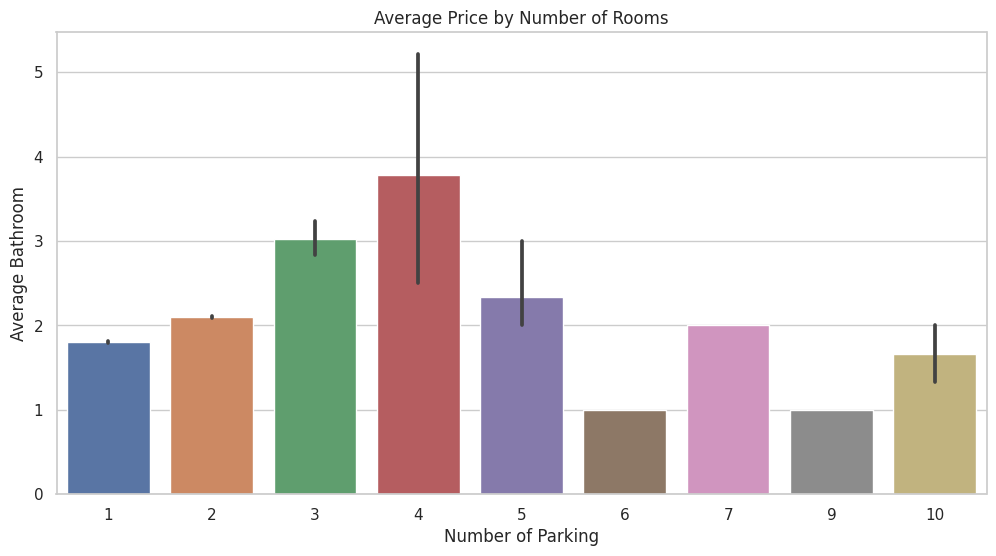

In [ ]:
# Bar Plot (Rooms by Price)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='parking', y='bathroom')
plt.title('Average Price by Number of Rooms')
plt.xlabel('Number of Parking')
plt.ylabel('Average Bathroom')
plt.show()

#### Rental vs Parking

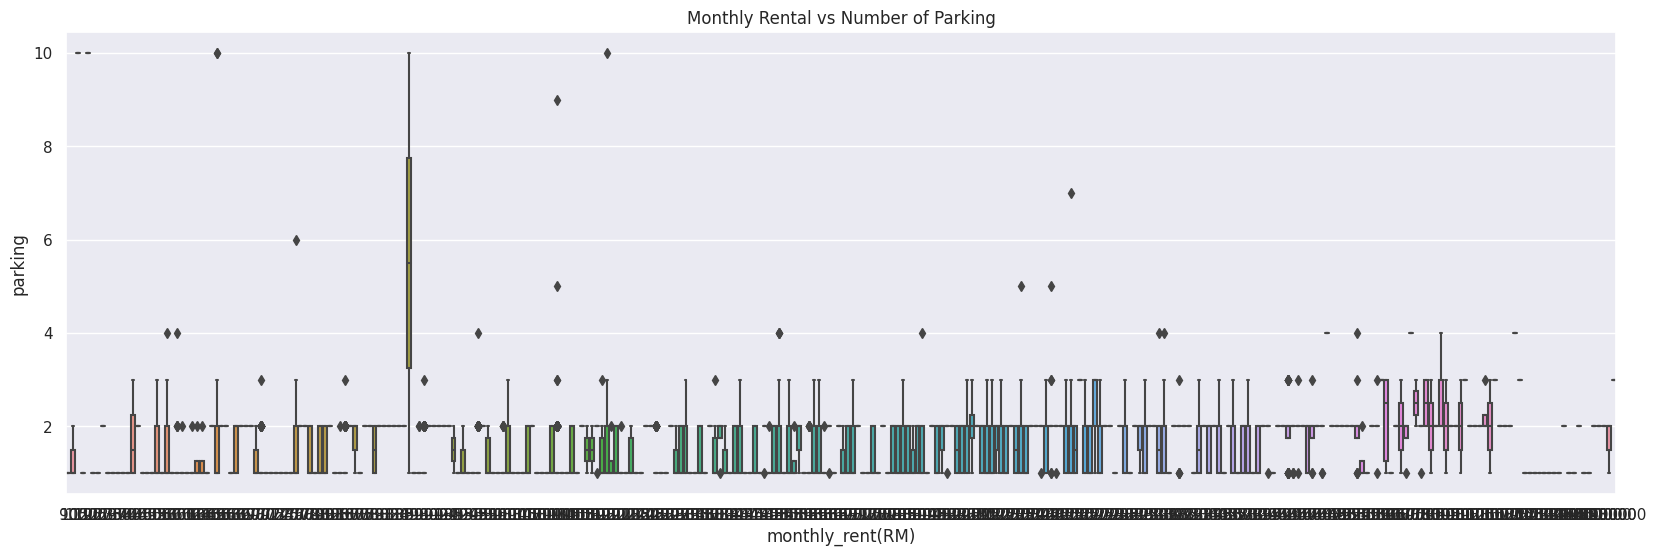

In [ ]:
# Box Plot (Price by Rooms)
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='monthly_rent(RM)', y='parking')
plt.title('Monthly Rental vs Number of Parking')

plt.show()

#### **Correlation Heatmap**

<ipython-input-143-6d8701039c6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


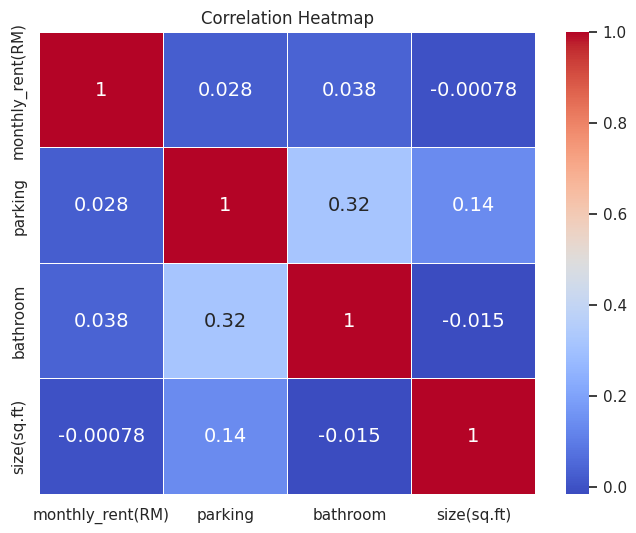

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Asking and Answering Questions
TODO - write some explanation here.


* Ask at least 10 interesting questions about your dataset

* Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn

* Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary

* Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

### Q1: The top region with highest bathroom?


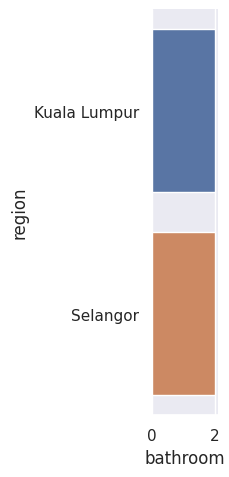

In [ ]:
#Graph (Bar Chart of Region vs Bathroom)

group=df.groupby("region")['bathroom'].median().sort_values(ascending=False).reset_index()

fig = sns.catplot(
        data=group, x="bathroom", y="region", kind="bar",
         height=5, aspect=0.5)

ANSWER:
Both the region (Kuala Lumpur & Selangor) has equal highest number of bathroom

### **Q2: The average number of parking provided in each location**

In [ ]:
# calculate the average price of all properties
df['parking'].mean().round(2)

1.41

**ANSWER**

The average parking of each loaction in Kuala Lumpur and Selangor is 1.41.

### **Q3: What are the most common numbers of parking and bathrooms offered by the properties in Kuala Lumpur and Selangor?**

In [ ]:
# groupby() splits the data into groups and size() return the number of elements in each groups
df.groupby(['parking','bathroom']).size().sort_values(ascending=False)

parking  bathroom
1        2           5768
2        2           3913
1        1           1748
2        3            510
         1            186
1        3            162
3        2             69
2        4             58
3        3             38
         5             19
1        4             17
3        4             16
2        5             13
3        7              5
4        2              4
10       2              4
1        5              4
4        5              2
10       1              2
5        2              2
4        8              2
         3              2
3        1              2
4        1              2
         4              1
2        6              1
3        6              1
5        3              1
6        1              1
7        2              1
9        1              1
1        8              1
4        7              1
dtype: int64

**ANSWER**

1 parking and2 bathrooms properties are the most common type of properties offered in Kuala Lumpur and Selangor.

### **Q4: What is the relationship between parking and bathroom of the properties?**

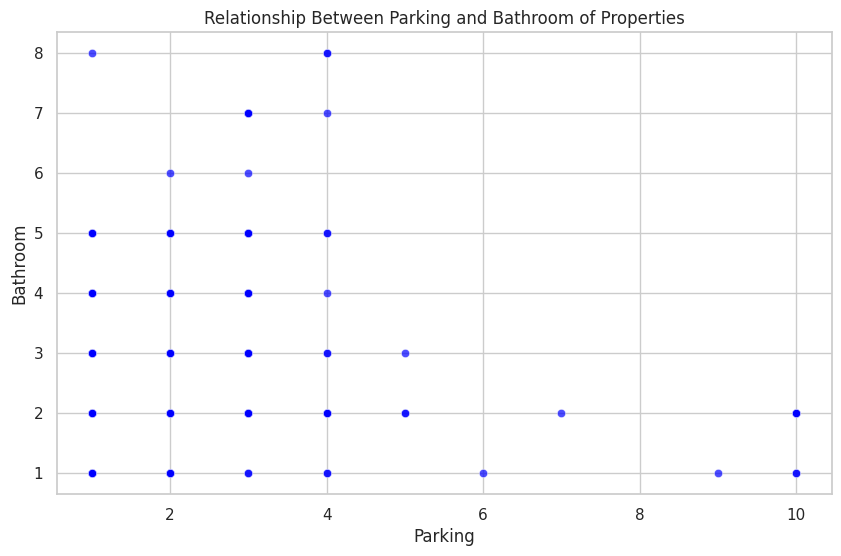

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(x='parking', y='bathroom', data=df, color='blue', alpha=0.7)

# Add title and labels
plt.title('Relationship Between Parking and Bathroom of Properties')
plt.xlabel('Parking')
plt.ylabel('Bathroom')

# Show the plot
plt.show()

**ANSWER**

The relationship between the number of bathroom and parking, is described, as a positive correlation.

### **Q4: What is the type of furnishing that most offered by the properties in Kuala Lumpur?**

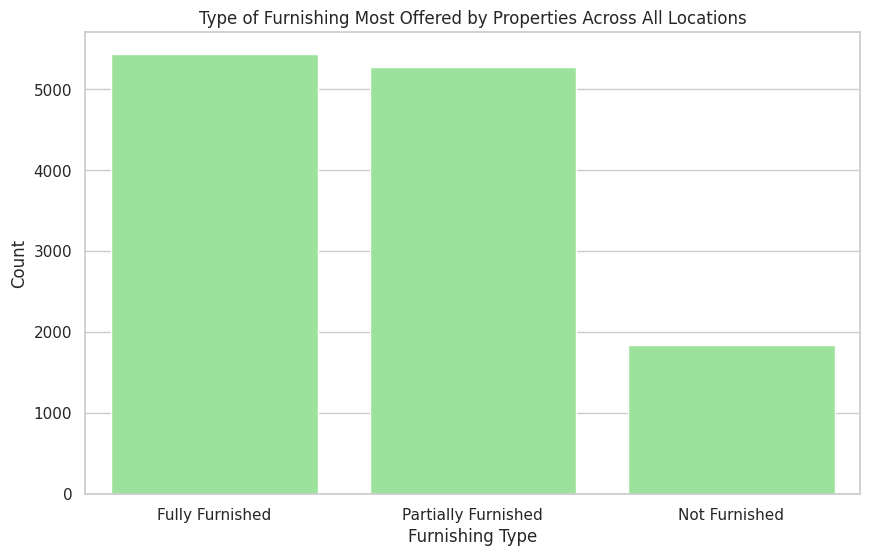

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
sns.countplot(x='furnish_info', data=df, color='lightgreen', order=df['furnish_info'].value_counts().index)

# Add title and labels
plt.title('Type of Furnishing Most Offered by Properties Across All Locations')
plt.xlabel('Furnishing Type')
plt.ylabel('Count')

# Show the plot
plt.show()

**ANSWER**

The graph shows most of the properties are fullt furnished

### **Q5: What is the type of property that most offered in Kuala Lumpur and Selangor?**

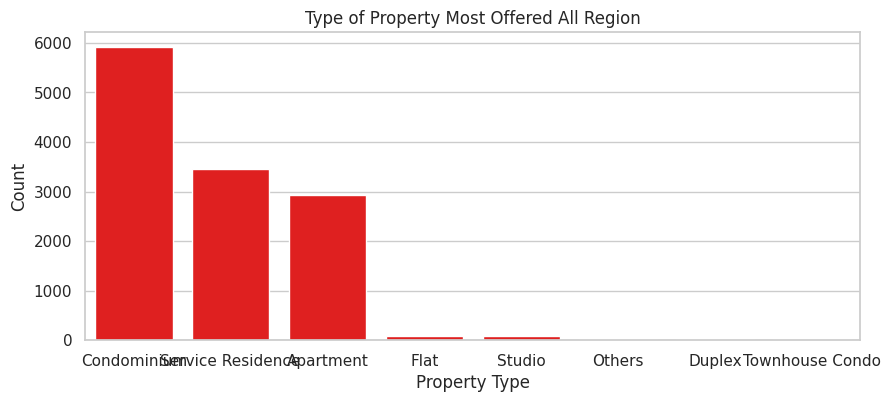

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Create a bar plot
sns.countplot(x='property_type', data=df, color='red', order=df['property_type'].value_counts().index)

# Add title and labels
plt.title('Type of Property Most Offered All Region')
plt.xlabel('Property Type')
plt.ylabel('Count')

# Show the plot
plt.show()

**ANSWER**

The graph shows most of the properties type are are condominium.

### **Q6: What is the number of room that most offered by the properties in Kuala Lumpur and *Selangor*?**

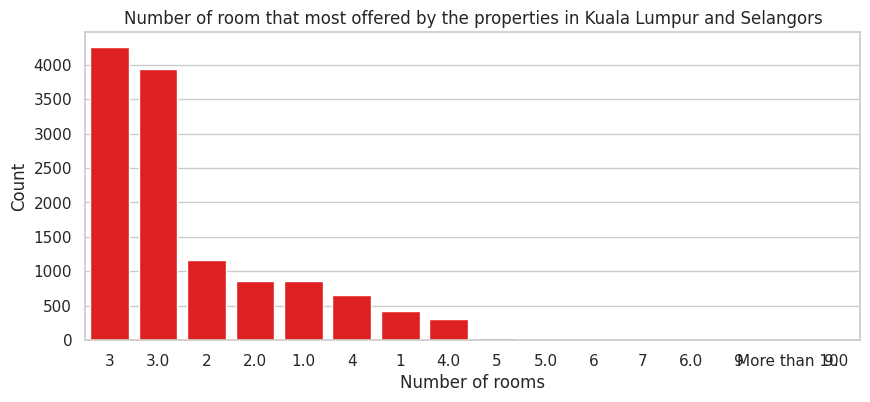

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Create a bar plot
sns.countplot(x='rooms', data=df, color='red', order=df['rooms'].value_counts().index)

# Add title and labels
plt.title('Number of room that most offered by the properties in Kuala Lumpur and Selangors')
plt.xlabel('Number of rooms')
plt.ylabel('Count')

# Show the plot
plt.show()

**ANSWER**

The graph shows most of the properties provies 3 number of bedrooms.

### **Q7: What is the size of property that most offered by the properties in Kuala Lumpur and *Selangor*?**

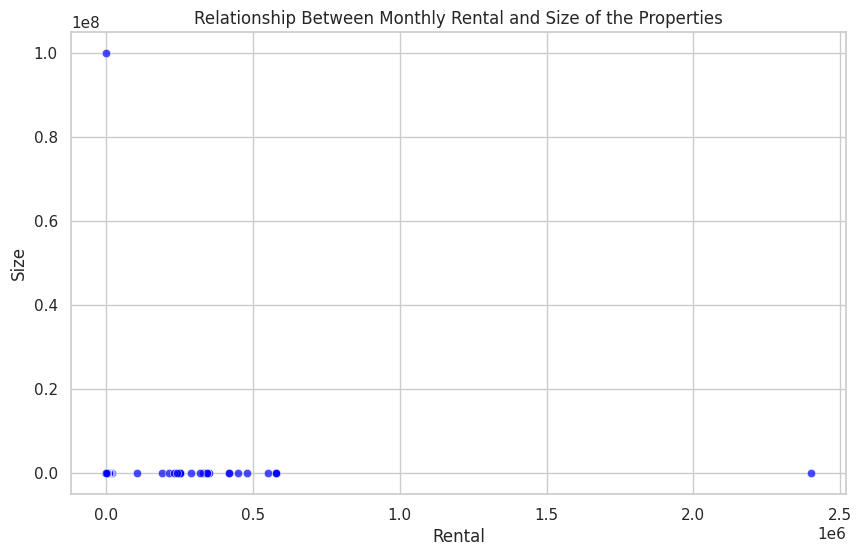

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(x='monthly_rent(RM)', y='size(sq.ft)', data=df, color='blue', alpha=0.7)

# Add title and labels
plt.title('Relationship Between Monthly Rental and Size of the Properties')
plt.xlabel('Rental')
plt.ylabel('Size')

# Show the plot
plt.show()

**ANSWER**

The relationship between the number of bathroom and parking, is described, as a positive correlation.

### **Q8: What is the average size of properties in the area?**

In [ ]:
df.groupby(['Area']).agg(Average_Size=('size(sq.ft)', 'mean')).round(2).sort_values(by=['Average_Size'], ascending=False)

,Average_Size
Area,
Cheras,70754.00
Bangsar,1557.07
Taman Tun Dr Ismail,1438.46
KLCC,1396.71
Bandar Mahkota Cheras,1342.91
...,...
KL Eco City,632.00
Pandan Perdana,565.56
517,557.00


**ANSWER**

The table shows that Cheras has the highest average size properties and Banting has least.

### **Q9: How does property size vary in different type of property?**

In [ ]:
df.groupby(['property_type']).agg(Average_Size=('size(sq.ft)', 'mean')).round(2).sort_values(by=['Average_Size'], ascending=False)

,Average_Size
property_type,
Condominium,17938.24
Townhouse Condo,1334.88
Duplex,1103.59
Others,1025.55
Apartment,884.48
Service Residence,863.55
Flat,687.41
Studio,528.09


**ANSWER**

The table shows that Condominium has the highest average size properties and Studio has least.

### **Q10: The top 5 area in Kuala Lumpur & Selangor with the highest and lowest price?**

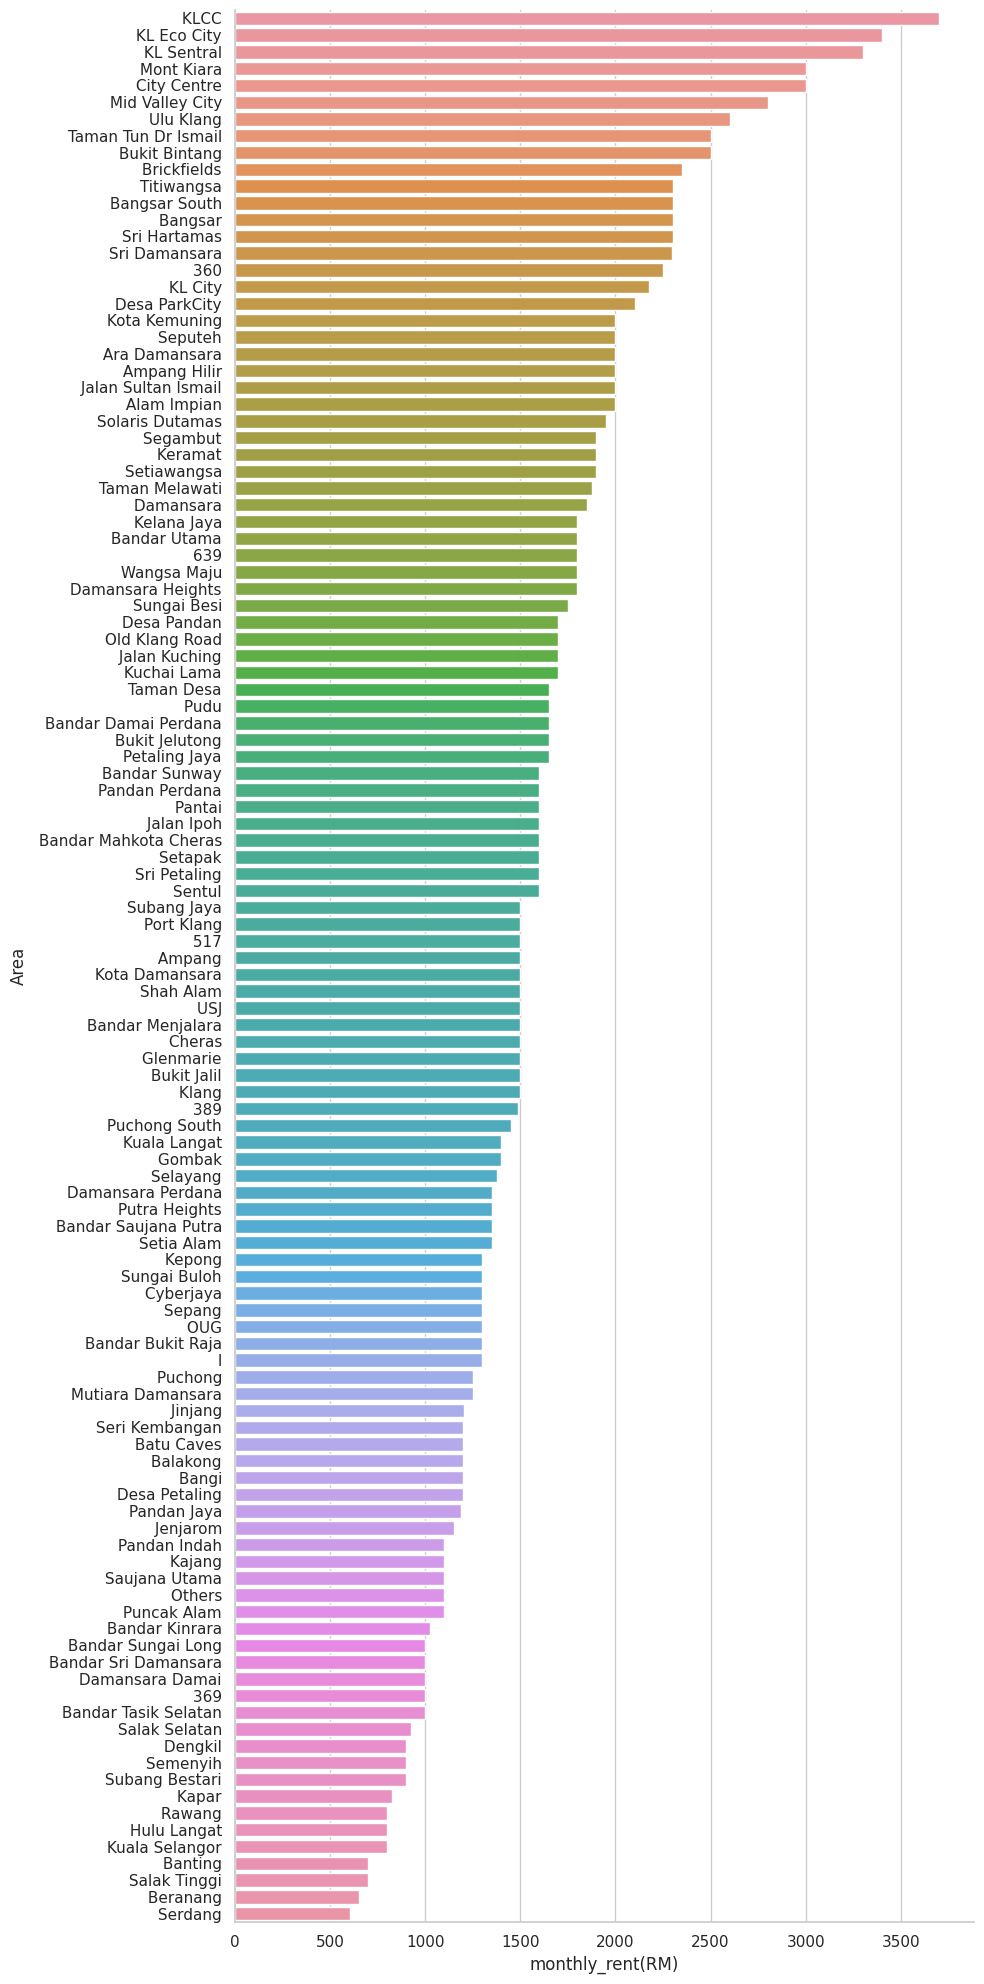

In [ ]:
#Graph (Bar Chart of Price vs Location)

group=df.groupby("Area")['monthly_rent(RM)'].median().sort_values(ascending=False).reset_index()

fig = sns.catplot(
        data=group, x="monthly_rent(RM)", y="Area", kind="bar",
         height=20, aspect=0.5)

**ANSWER:**

Top 5 Highest Price

1 : KLCC

2 : CKL Eco City

3 : KL Sentral

4 : Mont Kiara

5 : City Central

Top 5 Lowest Price

1 : Kuala Selangor

2 : Banting

3 : Salak Tinggi

4 : Beranang

5 : Serdang

## **Inferences and Conclusion**

For this study, we examined a dataset containing property-related data. Graphs were employed to aid in our understanding of the data.Our research revealed that larger properties typically have higher prices, and the properties from Kuala Lumpur have higher prices also. The graphs demonstrated a positive correlation between the size of the property and the area and the price of the property. In summary, the quantity, the area and size of rooms have a significant impact on the cost of propertiese. However, further data may be required to provide more accurate home price forecasts.


**References**:

Matplotlib: https://matplotlib.org/

Seaborn: https://seaborn.pydata.org/

Pandas: https://pandas.pydata.org/

Python: https://www.python.org/


**Future Work**:

For future work :

1. Collaboration with Real Estate Agent for more info:

  Collaborate with real estate agents to gain more information. From their information it can provide more accurate understanding.

2. Enhanced EDA Techniques:

  Explore advanced exploratory data analysis (EDA) techniques.